In [ ]:
#for i in *.jpeg; do newname="$(echo $i|cut -d. -f1)";mv $i $newname;done

In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pandas as pd
import numpy as np
import itertools as it
from skimage import io, transform
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
PATH         = './data_reduced'
BATCH_SIZE   = 1
WORKERS      = 3
L            = 200

In [8]:
class WDD(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform  
        self.n_images = len(os.listdir(root_dir))
    def __len__(self):
            return self.n_images    
    def __getitem__(self, location):
        img_name = PATH + '/' +str(location) 
        image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
        return image

tense        = transforms.ToTensor()
pil          = transforms.ToPILImage()
resize       = transforms.Resize((L,L))
grayscale    = transforms.Grayscale()
composed     = transforms.Compose([pil, resize, grayscale, tense])
        
d_set        = WDD(PATH, composed)
print(f'Number of images in the dataset is {len(d_set)}')

img_loader = DataLoader(dataset=d_set,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=WORKERS)

Number of images in the dataset is 549


In [9]:
import time

In [26]:
temp = torch.zeros((1,1,200,200), dtype=torch.float64)
temp = temp.type(torch.FloatTensor).cuda()
start = time.time()
for i,j in enumerate(img_loader):
    img = j.type(torch.FloatTensor).cuda()
    temp.add_(img)
end = time.time()-start
print(f'time: {end}')

time: 3.68902850151062


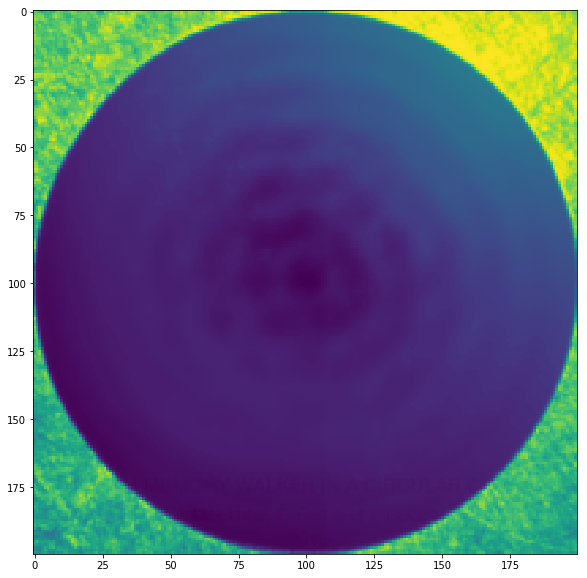

In [27]:
view_img = temp.detach().cpu().numpy().reshape(L,L)
plt.figure(figsize=(10,10))
plt.imshow(view_img)
plt.show()

In [30]:
temp_flat = temp.squeeze().reshape(-1)
temp_flat = temp_flat.cpu().detach().numpy()

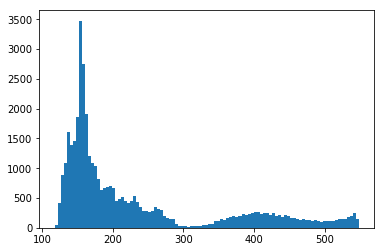

In [42]:
plt.figure()
plt.hist(temp_flat, bins=101)
plt.show()

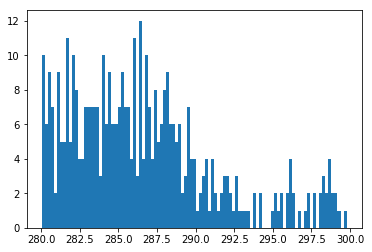

In [40]:
plt.figure()
plt.hist(temp_flat[np.where((temp_flat>280)&(temp_flat<300))], bins=101)
plt.show()

In [43]:
mask = temp_flat<294

In [ ]:
print(f'(5,5) {view_img[5,5]}')
print(f'(195,5) {view_img[195,5]}')
print(f'(5,195) {view_img[5,195]}')a
print(f'(195,195) {view_img[195,195]}')
print(f'(0,0) {view_img[5,5]}')

In [ ]:
temp_std = torch.zeros((1,200,200), dtype=torch.float64)
temp_std = temp_std.type(torch.FloatTensor).cuda()
start = time.time()
for i,j in enumerate(img_loader):
    if i==1:break
    img = j.type(torch.FloatTensor).cuda()
    temp_std.add_(torch.std(img, dim=0))
temp_std.div_(5.0)
end = time.time()-start
print(f'time: {end}')

In [ ]:
view_img = temp_std.detach().cpu().numpy().reshape(L,L)
plt.figure(figsize=(10,10))
plt.imshow(view_img)
plt.show()

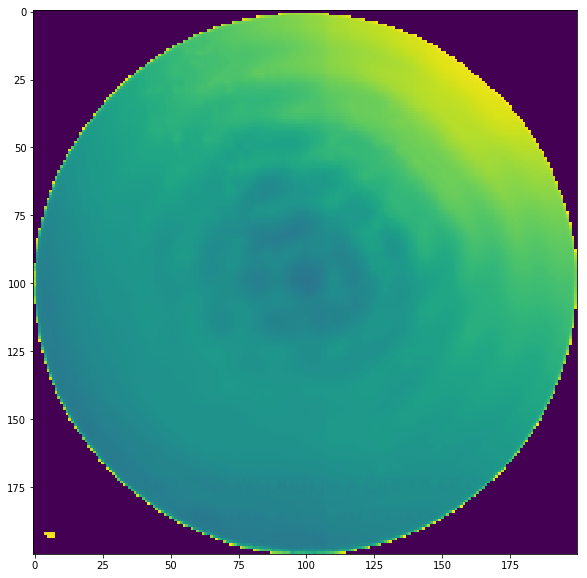

In [48]:
mask = view_img<300.0

plt.figure(figsize=(10,10))
plt.imshow(view_img*mask)
plt.show()

In [49]:
np.savetxt('./img_mask', mask)

In [2]:
mask = np.loadtxt('./img_mask')